In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/sharanyamanohar/Machine_learning/main/ineuron/Electricity_consumption_Regression/electricity%20(1).csv')
data

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Target
0,641925,6/3/2008,12:09:00,1.322,0.058,239.17,5.4,0.0
1,495667,25/11/2007,22:31:00,0.294,0.064,244.26,1.2,0.0
2,1302460,8/6/2009,05:04:00,0.336,0.094,239.77,1.6,1.0
3,749968,20/5/2008,12:52:00,1.548,0.190,239.85,6.4,23.0
4,482440,16/11/2007,18:04:00,2.838,0.060,238.33,11.8,18.0
...,...,...,...,...,...,...,...,...
14995,1200598,29/3/2009,11:22:00,0.708,0.102,244.35,2.8,0.0
14996,1253127,4/5/2009,22:51:00,0.612,0.000,242.65,2.4,1.0
14997,154064,2/4/2007,17:08:00,0.300,0.106,240.42,1.2,0.0
14998,1586574,22/12/2009,12:18:00,1.480,0.060,246.65,6.0,19.0


# observation

totally 15000 rows and 8 columns.

In [3]:
#checking the null values
data.isnull().sum()

Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Target                   0
dtype: int64

# observation

There are zero null values present in the features.

In [4]:
#datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   Date                   15000 non-null  object 
 2   Time                   15000 non-null  object 
 3   Global_active_power    15000 non-null  float64
 4   Global_reactive_power  15000 non-null  float64
 5   Voltage                15000 non-null  float64
 6   Global_intensity       15000 non-null  float64
 7   Target                 15000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 937.6+ KB


# observation

There are 6 numerical and 2 categorical features.

In [5]:
#converting the object datatype of feature to datetime datatype
data['Date'] = pd.to_datetime(data.Date)
data['Date'].dtype

C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '25/11/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '16/11/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '26/11/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '16/11/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Tem

C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '28/10/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '16/10/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '29/12/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2455179578.py:2: UserWarning: Parsing '18/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)
C:\Users\saran\AppData\Local\Tem

dtype('<M8[ns]')

In [6]:
#created different features with date feature
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day

In [7]:
#removing unnecessary features out the columns
data.drop(['Unnamed: 0', 'Date', 'Time'], axis=1, inplace=True)

# Exploratory Data Analysis

In [8]:
#seperating out the features 
numerical_features = [feature for feature in data.columns if feature not in ['Year', 'Day', 'Month']]
numerical_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Target']

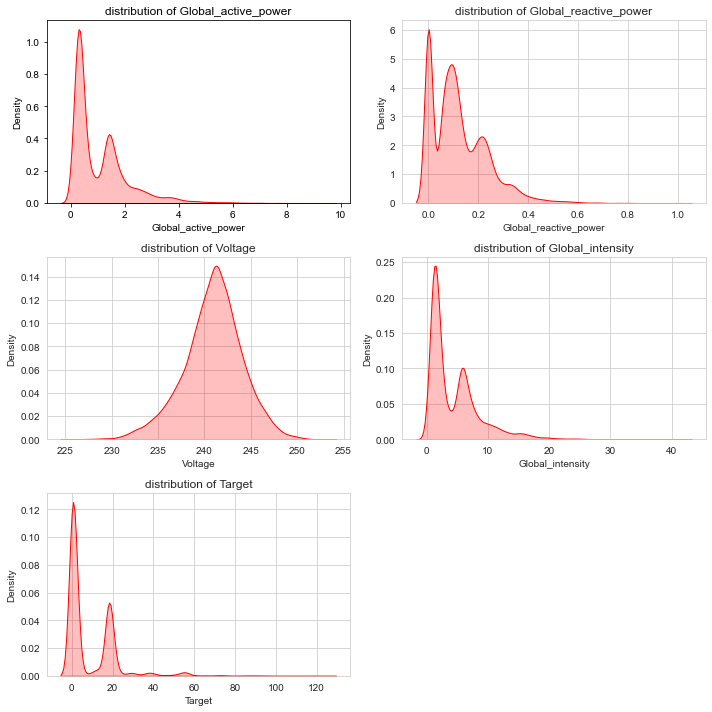

In [9]:
#checking the distribution of the feratures 
plt.figure(figsize=(10,10))
plt.title('Distribution of different features')
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i+1)
    sns.set_style(style='whitegrid')
    sns.kdeplot(data[numerical_features[i]], shade=True, color='r')
    plt.title('distribution of {}'.format(numerical_features[i]))
    plt.tight_layout()

In [10]:
#importing probability plot
from scipy.stats import probplot

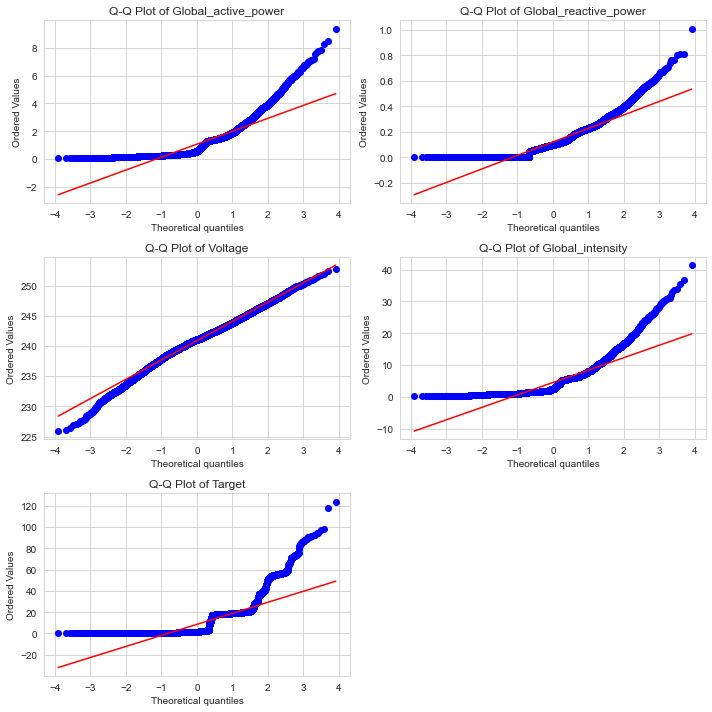

In [11]:
#drawing the Q-Q Plot of the feratures 
plt.figure(figsize=(10,10))
plt.title('Q-Q Plot of different features')
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i+1)
    sns.set_style(style='whitegrid')
    probplot(data[numerical_features[i]], dist= 'norm', fit=True, plot=plt)
    plt.title('Q-Q Plot of {}'.format(numerical_features[i]))
    plt.tight_layout()

# observation

Except the feature voltage, all the features are rightly skewed. voltage is approximately
normally distributed.

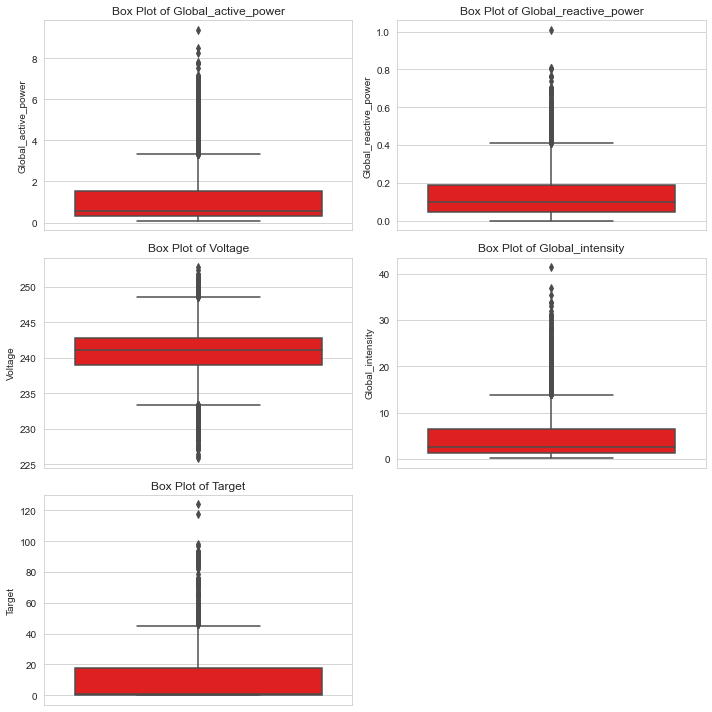

In [12]:
#checking the outliers
plt.figure(figsize=(10,10))
plt.title('Box Plot of different features')
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i+1)
    sns.set_style(style='whitegrid')
    sns.boxplot(y= data[numerical_features[i]], color='r')
    plt.title('Box Plot of {}'.format(numerical_features[i]))
    plt.tight_layout()

# observation

Target feature has outliers present in both the sides. remaining features are all having outliers
present in the upper boundary.

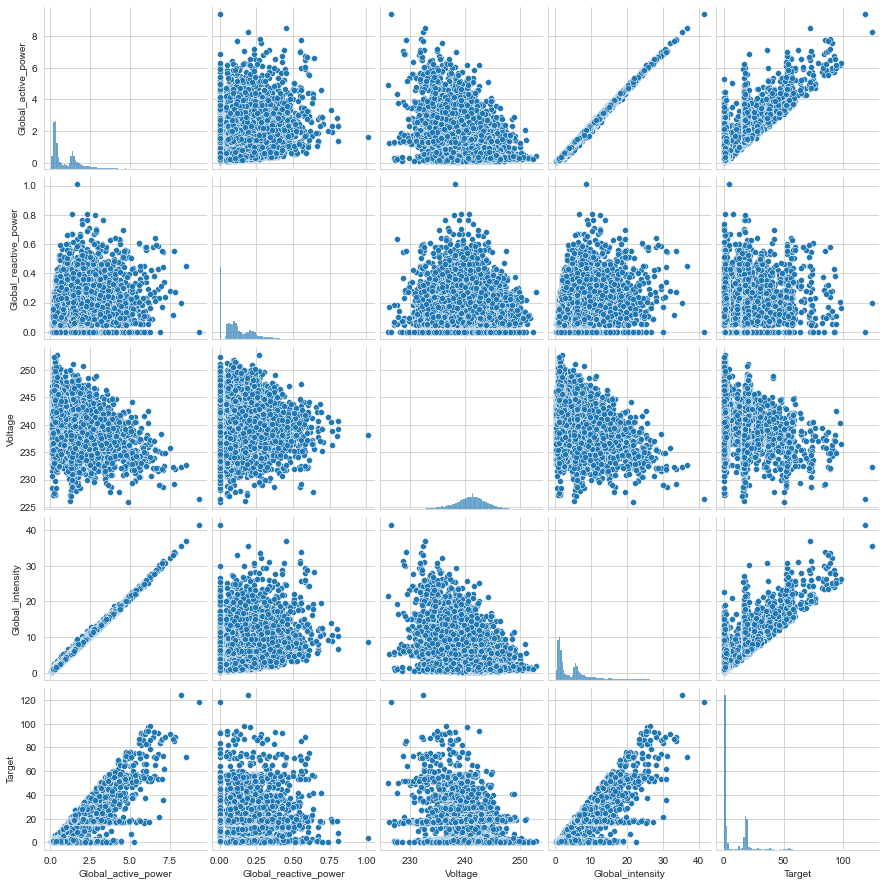

In [13]:
#drawing the pairplot of the features 
sns.pairplot(data[numerical_features])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


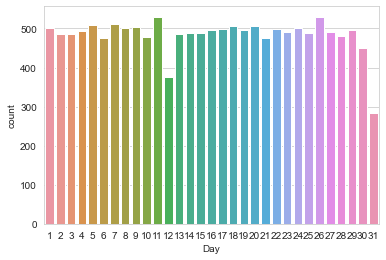

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


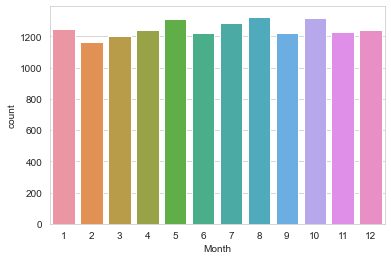

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


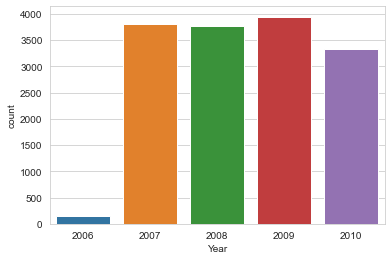

In [14]:
#count plot of days, month and year
for feature in ['Day', 'Month', 'Year']:
    sns.countplot(data[feature])
    plt.show()

# Bi-Variate Analysis

Text(0.5, 1.0, 'Voltage vs Day')

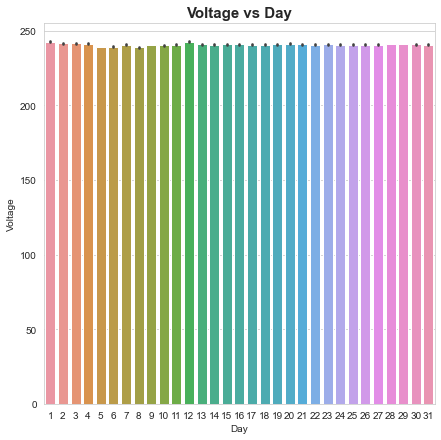

In [15]:
#comparing day and voltage
plt.figure(figsize=(7,7))
sns.barplot(x=data['Day'], y=data['Voltage'])
plt.title('Voltage vs Day', fontsize=15, fontweight='bold')

# observation

The average voltage used is same for almost all the days.

Text(0.5, 1.0, 'Voltage vs Global_active_power')

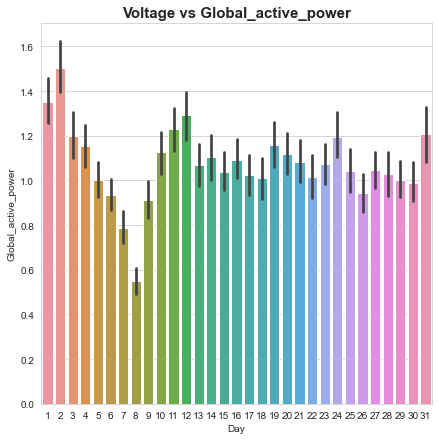

In [16]:
#comparing day and voltage
plt.figure(figsize=(7,7))
sns.barplot(x=data['Day'], y=data['Global_active_power'])
plt.title('Voltage vs Global_active_power', fontsize=15, fontweight='bold')

# observation

The Average Global active power is high in day 1 and 2, in day 8 the power was low.

Text(0.5, 1.0, 'Voltage vs year')

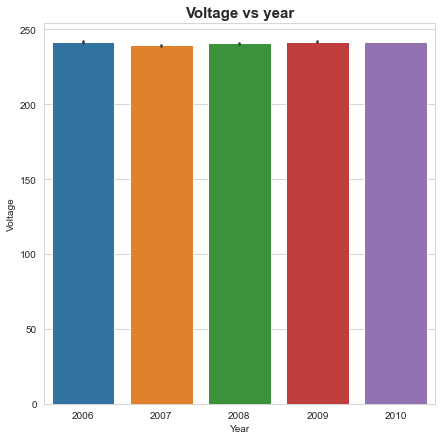

In [17]:
#comparing year vs voltage
plt.figure(figsize=(7,7))
sns.barplot(x=data['Year'], y=data['Voltage'])
plt.title('Voltage vs year', fontsize=15, fontweight='bold')

# Multivariate Analysis

In [18]:
#finding the corelation between the features
round(data[numerical_features].corr(), 2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Target
Global_active_power,1.00,0.26,-0.39,1.00,0.84
Global_reactive_power,0.26,1.00,-0.11,0.27,0.18
Voltage,-0.39,-0.11,1.00,-0.41,-0.34
Global_intensity,1.00,0.27,-0.41,1.00,0.84
Target,0.84,0.18,-0.34,0.84,1.00


<AxesSubplot:>

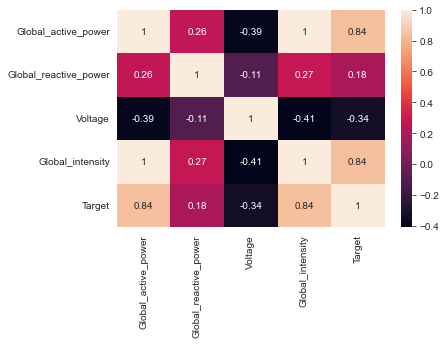

In [19]:
#visualizing the corelation using heatmap
sns.heatmap(round(data[numerical_features].corr(), 2), annot=True)

# observation 

Target vatriable is highly corelated with global active power and global intensity. 

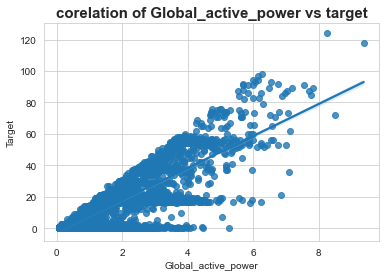

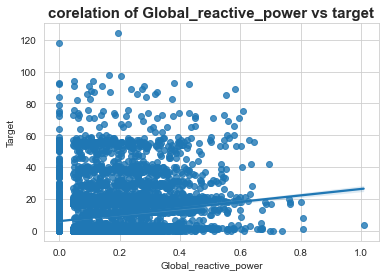

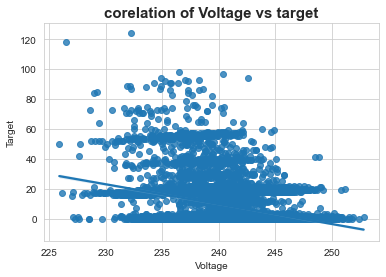

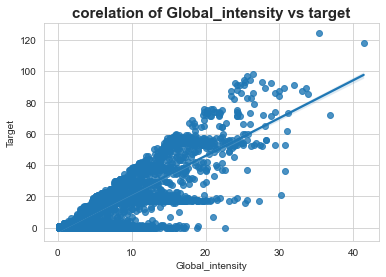

In [20]:
#corelation plot of target variable vs other independent featrues 
for feature in ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']:
    sns.regplot(x=data[feature], y=data['Target'])
    plt.title('corelation of {} vs target'.format(feature), fontsize=15, fontweight='bold')
    plt.show()

In [21]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [22]:
#finding the multicolinearity between the features 
compute_vif(numerical_features)

C:\Users\saran\AppData\Local\Temp\ipykernel_9400\2665680971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Global_active_power,605.342005
1,Global_reactive_power,1.313295
2,Voltage,1.296470
3,Global_intensity,609.944506
4,Target,3.491173


In [23]:
#finding the column with highh corelation using this code
corelation_features = set()
corelation_matrix = round(data[numerical_features].corr(), 2)
for i in range (len(corelation_matrix)):
    for j in range(i):
        if abs (corelation_matrix.iloc[i,j])>0.80:
            features = corelation_matrix.columns[i]
            corelation_features.add(features)

In [24]:
#corelated features
corelation_features

{'Global_intensity', 'Target'}

# observation

Since, global intensity explains the variation of global active power, Removing global intensity.
it is good that target explains the variation so do not need to remove the feature.

In [25]:
numerical_features = [feature for feature in numerical_features if feature not in ['Global_intensity', 'Target']]
numerical_features

['Global_active_power', 'Global_reactive_power', 'Voltage']

# observation

Removed Global intensity. so, there is no place for multicolinearity.

In [26]:
#numerical features after removing the multi colineared features
numerical_features

['Global_active_power', 'Global_reactive_power', 'Voltage']

In [27]:
#removing the extreme outliers
for feature in numerical_features:
    upper_quantile = data[feature].quantile(0.75)
    lower_quantile = data[feature].quantile(0.25)
    inter_quantile = upper_quantile-lower_quantile
    lower_boundary = lower_quantile-(3*inter_quantile)
    upper_boundary = upper_quantile+(3*inter_quantile)
    data.loc[data[feature]>upper_boundary, feature] = np.nan
    data.loc[data[feature]<lower_boundary, feature] = np.nan

In [28]:
#removing the extreme outliers
data.dropna(inplace=True)

In [29]:
#now fixing the outliers by 1.5
for feature in numerical_features:
    upper_quantile = data[feature].quantile(0.75)
    lower_quantile = data[feature].quantile(0.25)
    inter_quantile = upper_quantile-lower_quantile
    lower_boundary = lower_quantile-(1.5*inter_quantile)
    upper_boundary = upper_quantile+(1.5*inter_quantile)
    data.loc[data[feature]>upper_boundary, feature] = upper_boundary
    data.loc[data[feature]<lower_boundary, feature] = lower_boundary

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


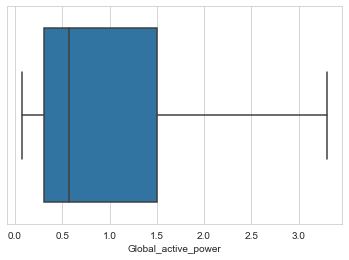

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


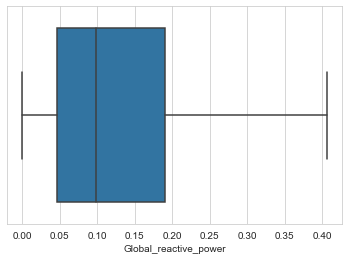

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


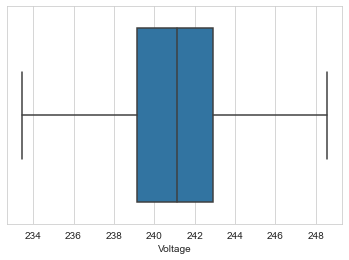

In [30]:
#plotting to checking the outliers
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.show()

# observation

Now, we have removed all the outliers by imputing end values.

In [31]:
#removing the unnecessary features which are unfit for model
unwanted_features = [feature for feature in data.columns if feature not in numerical_features+['Target']]
unwanted_features

['Global_intensity', 'Year', 'Month', 'Day']

In [32]:
#dropping the unwanted features 
data.drop(unwanted_features, axis=1, inplace=True)

In [33]:
#creating x variable which has all the independent features
x = data.drop('Target', axis=1)
x

,Global_active_power,Global_reactive_power,Voltage
0,1.322,0.058,239.17
1,0.294,0.064,244.26
2,0.336,0.094,239.77
3,1.548,0.190,239.85
4,2.838,0.060,238.33
...,...,...,...
14995,0.708,0.102,244.35
14996,0.612,0.000,242.65
14997,0.300,0.106,240.42
14998,1.480,0.060,246.65


In [34]:
#creating y as target variable
y = data.Target

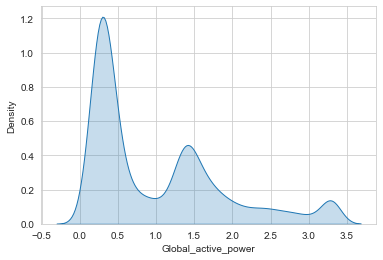

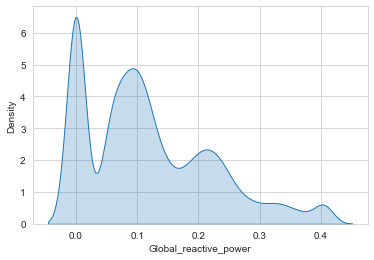

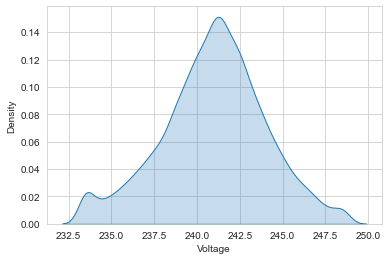

In [35]:
#checking for the distribution of features
for feature in x:
    sns.kdeplot(data[feature], shade=True)
    plt.show()

# observation

Still the features are rightly skewed, so applying log normal distribution to make it look like 
normal distribution.

In [36]:
#importing boxcox for feature transformation
from scipy.stats import boxcox

In [37]:
#applying boxcox on features
for feature in x:
    data[feature], opt= boxcox(data[feature]+1)

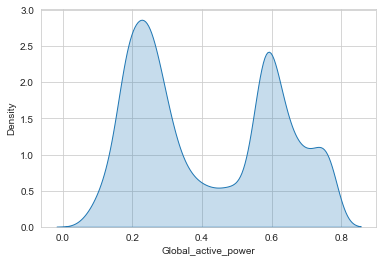

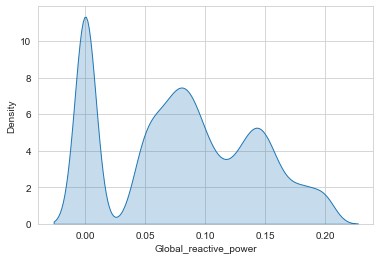

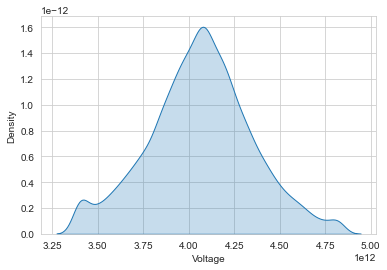

In [38]:
#checking for the distribution of features
for feature in x:
    sns.kdeplot(data[feature], shade=True)
    plt.show()

# observation

now, the features are ready for model fitting.

In [39]:
#seeing the descriptive analysis of the features
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Target
count,14859.000000,14859.000000,1.485900e+04,14859.000000
mean,0.416745,0.080710,4.061233e+12,8.172757
std,0.204451,0.059761,2.863057e+11,11.510340
min,0.072350,0.000000,3.398533e+12,0.000000
25%,0.231882,0.041679,3.884051e+12,0.000000
50%,0.361254,0.079994,4.069767e+12,1.000000
75%,0.599451,0.131042,4.238317e+12,18.000000
max,0.766274,0.201044,4.819160e+12,76.000000


In [40]:
#importing train and test split
from sklearn.model_selection import train_test_split

In [41]:
#applying train test split on variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [42]:
#shape of the train and test split
print('shape of x_train:', x_train.shape, '\nshape of x_test:', x_test.shape, '\nshape of y_train:',
     y_train.shape, '\nshape of y_test:', y_test.shape)

shape of x_train: (11887, 3) 
shape of x_test: (2972, 3) 
shape of y_train: (11887,) 
shape of y_test: (2972,)


# Model Fitting : Linear Regression

In [43]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

In [44]:
#creating an object for linear model
linear = LinearRegression()
linear

LinearRegression()

In [45]:
#fitting the model on training dataset
linear.fit(x_train, y_train)

LinearRegression()

In [46]:
#now, predicting the model
linear_predict = linear.predict(x_test)
linear_predict

array([16.35001117,  3.22978071,  6.59092594, ..., 14.90554485,
        3.31410741, -0.26575693])

# Metrics : Linear Regression

In [47]:
#importing the libraries for model metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [48]:
#r2 score and adjucent r2 score
r2_linear = r2_score(y_test, linear_predict)
r2_linear
#adjucent r2 score
adjr2_linear = 1-(1-r2_linear)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjr2_linear

0.6375531045308804

In [49]:
print('r2_score:', r2_linear, '\nadjusted r2 score:', adjr2_linear)

r2_score: 0.6379190892789138 
adjusted r2 score: 0.6375531045308804


In [50]:
#mean squared error
mean_error1 = mean_squared_error(y_test, linear_predict)
mean_error1

44.29521909993726

In [51]:
#mean absolute error
mean_abs1 = mean_absolute_error(y_test, linear_predict)
mean_abs1

4.197465143726143

In [52]:
#root mean squared error
root_mean1 = np.sqrt(mean_squared_error(y_test, linear_predict))
root_mean1

6.65546535562595

In [53]:
#Report 

print('r2_score:', r2_linear, '\nadjusted r2 score:', adjr2_linear, '\nmean_squared_error:', 
     mean_error1, '\nmean absolute error:', mean_abs1, '\nroot mean squared error:', 
     root_mean1)

r2_score: 0.6379190892789138 
adjusted r2 score: 0.6375531045308804 
mean_squared_error: 44.29521909993726 
mean absolute error: 4.197465143726143 
root mean squared error: 6.65546535562595


# Checking the assumptions

In [54]:
#residuals
residual_linear = y_test-linear_predict
residual_linear

7442    -16.350011
11495     0.770219
443       7.409074
9602      1.741845
20       -2.097814
           ...    
11554    -9.099034
11635    -0.562072
14658     9.094455
9251     -3.314107
12219     0.265757
Name: Target, Length: 2972, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='Density'>

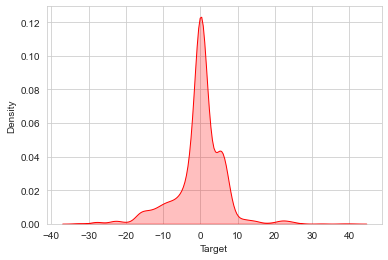

In [55]:
#distribution of the residuals
sns.kdeplot(residual_linear, shade=True, color='r')

# observation

The residuals are normally distributed.

<AxesSubplot:xlabel='Target'>

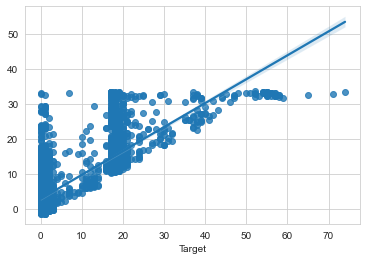

In [56]:
#scatter plot of true and predicted values
sns.regplot(x=y_test, y=linear_predict)

<AxesSubplot:ylabel='Target'>

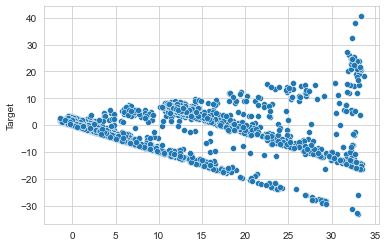

In [57]:
#scatter plot of residuals and predicted values
sns.scatterplot(x=linear_predict, y=residual_linear)

# model : Ridge Regression

In [58]:
#importing the library for ridge
from sklearn.linear_model import Ridge
#importing grid search and kfold
from sklearn.model_selection import GridSearchCV, KFold

In [59]:
#creating an object for ridge
ridge = Ridge()

In [60]:
#creating parameter for gridsearch cv
param1 = {'alpha':range(1,100)}
kfold1 = KFold(10)
grid1 = GridSearchCV(ridge, param_grid=param1, cv=kfold1, verbose=True)

In [61]:
#fitting grid on training dataset
grid1.fit(x_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Ridge(), param_grid={'alpha': range(1, 100)},
             verbose=True)

In [62]:
#predicting the model
ridge_predict = grid1.predict(x_test)
ridge_predict

array([16.31015723,  3.30911688,  6.62595287, ..., 14.86418747,
        3.29797587, -0.24678396])

# Metrics: Ridge

In [63]:
#r2 and adjusted r2 score
r2_ridge = r2_score(y_test, ridge_predict)
adjr2_ridge = 1-(1-r2_ridge)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [64]:
#mean squared, mean absolute, root mean squared error
mean_error2 = mean_squared_error(y_test, ridge_predict)
mean_abs2 = mean_absolute_error(y_test, ridge_predict)
root_mean2 = np.sqrt(mean_squared_error(y_test, ridge_predict))

# Report

In [65]:
print('r2_score:', r2_ridge, '\nadjusted r2 score:', adjr2_ridge, '\nmean_squared_error:', 
     mean_error2, '\nmean absolute error:', mean_abs2, '\nroot mean squared error:', 
     root_mean2)

r2_score: 0.6380316779301756 
adjusted r2 score: 0.6376658069846872 
mean_squared_error: 44.28144555146195 
mean absolute error: 4.198014915245432 
root mean squared error: 6.6544305204474075


# Model : SVR 

In [66]:
#importing library
from sklearn.svm import SVR

In [67]:
#creating an object for svr
svr = SVR(kernel='linear')

In [68]:
#fitting the model on training dataset
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [69]:
#prediction using svr
svr_pred = svr.predict(x_test)
svr_pred

array([18.14977481,  3.47493461,  7.27095327, ..., 16.52933252,
        3.75227665, -0.29476532])

# Metrics : SVR

In [70]:
#r2 score and adjusted r2 score
r2_svr = r2_score(y_test, svr_pred)
adjr2_svr = 1-(1-r2_svr)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [71]:
#mean squared, mean absolute, root mean squared error
mean_error3 = mean_squared_error(y_test, svr_pred)
mean_abs3 = mean_absolute_error(y_test, svr_pred)
root_mean3 = np.sqrt(mean_squared_error(y_test, svr_pred))

# Report

In [72]:
print('r2_score:', r2_svr, '\nadjusted r2 score:', adjr2_svr, '\nmean_squared_error:', 
     mean_error3, '\nmean absolute error:', mean_abs3, '\nroot mean squared error:', 
     root_mean3)

r2_score: 0.6099590594253037 
adjusted r2 score: 0.6095648131915692 
mean_squared_error: 47.71571328158296 
mean absolute error: 4.219775535677468 
root mean squared error: 6.907656135157783


# Model: Random Forest

In [73]:
#importing library
from sklearn.ensemble import RandomForestRegressor

In [74]:
#creating an object for random forest
random = RandomForestRegressor()

In [75]:
#fitting the model
random.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
#testing the model
random_pred = random.predict(x_test)

# Metrics : Random Forest

In [77]:
#r2 score and adjusted r2 score
r2_random = r2_score(y_test, random_pred)
adjr2_random = 1-(1-r2_random)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [78]:
#r2 score and adjusted r2 score
r2_random = r2_score(y_test, random_pred)
adjr2_random = 1-(1-r2_random)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [79]:
#mean squared, mean absolute, root mean squared error
mean_error4 = mean_squared_error(y_test, random_pred)
mean_abs4 = mean_absolute_error(y_test, random_pred)
root_mean4 = np.sqrt(mean_squared_error(y_test, random_pred))

# Report

In [80]:
print('r2_score:', r2_random, '\nadjusted r2 score:', adjr2_random, '\nmean_squared_error:', 
     mean_error4, '\nmean absolute error:', mean_abs4, '\nroot mean squared error:', 
     root_mean4)

r2_score: 0.6807975177712509 
adjusted r2 score: 0.6804748737528256 
mean_squared_error: 39.04968052419026 
mean absolute error: 3.181483151251321 
root mean squared error: 6.248974357779863


# Model : ElasticNet

In [81]:
#importing the model
from sklearn.linear_model import ElasticNet

In [82]:
#creating an object for elasticnet
elastic = ElasticNet()

In [83]:
#fitting the model
elastic.fit(x_train, y_train)

ElasticNet()

In [84]:
#testing the model
elastic_pred = elastic.predict(x_test)

# Metrics : Elastic Net

In [85]:
#r2 score and adjusted r2 score
r2_elastic = r2_score(y_test, elastic_pred)
adjr2_elastic = 1-(1-r2_elastic)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [86]:
#mean squared, mean absolute, root mean squared error
mean_error5 = mean_squared_error(y_test, elastic_pred)
mean_abs5 = mean_absolute_error(y_test, elastic_pred)
root_mean5 = np.sqrt(mean_squared_error(y_test, elastic_pred))

# Report

In [87]:
print('r2_score:', r2_elastic, '\nadjusted r2 score:', adjr2_elastic, '\nmean_squared_error:', 
     mean_error5, '\nmean absolute error:', mean_abs5, '\nroot mean squared error:', 
     root_mean5)

r2_score: 0.5377085743685106 
adjusted r2 score: 0.5372412986687483 
mean_squared_error: 56.554486525093296 
mean absolute error: 5.532967224552561 
root mean squared error: 7.520271705536529


# Note:
    
Out of all these models Random Forest regressor gave the maximum accuracy of around 67.

# Saving the Models

In [88]:
#importing pickle
from pickle import dump, load

In [89]:
#saving all the models
filename = 'linear model.pkl'
dump(linear, open(filename, 'wb'))

In [90]:
filename = 'svr model.pkl'
dump(svr, open(filename, 'wb'))

In [91]:
filename = 'Random forest regressor.pkl'
dump(random, open(filename, 'wb'))

In [92]:
filename = 'elastic net.pkl'
dump(elastic, open(filename, 'wb'))

In [93]:
filename = 'ridge regressor.pkl'
dump(ridge, open(filename, 'wb'))

In [94]:
filename = 'box cox.pkl'
dump(boxcox, open(filename, 'wb'))